# Listing 5.1 Calculating dividend growth

In [1]:
def calc_div_growth_rate(stock):
    try:
        dividends = stock.dividends
        if dividends.empty:
            return None, None

        dividends_by_year = dividends.resample('YE').sum()

        if len(dividends_by_year) > 1:
            first_year = dividends_by_year.index[0].year
            last_year = dividends_by_year.index[-1].year
            first_dividend = dividends_by_year.iloc[0]
            last_dividend = dividends_by_year.iloc[-1]
            num_years = last_year - first_year
            cagr = ((last_dividend / first_dividend) ** (1 / num_years)) - 1
        else:
            cagr = None

        # Determine payout frequency
        payouts_per_year = dividends.resample('YE').count().mean()
        if payouts_per_year > 3.5:
            payout_frequency = "Quarterly"
        elif payouts_per_year > 1.5:
            payout_frequency = "Semi-Annual"
        elif payouts_per_year > 0.5:
            payout_frequency = "Annual"
        else:
            payout_frequency = "Irregular"

        return cagr, payout_frequency
    except Exception as e:
        print(f"Error processing {stock}: {e}")
        return None, None

In [2]:
import yfinance as yf
stock = yf.Ticker("AAPL")
calc_div_growth_rate(stock)

(np.float64(0.18210684137221889), 'Semi-Annual')

# Listing 5.2 Executing Code

In [9]:
import requests
import pandas as pd
import yfinance as yf
from io import StringIO

def get_sp500_tickers():
    url = ("https://en.wikipedia.org/wiki/"
           "List_of_S%26P_500_companies") #A
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
    }
    response = requests.get(url, headers=headers) #A
    tables = pd.read_html(StringIO(response.text)) #A
    sp500_table = tables[0]  #A
    return sp500_table["Symbol"].tolist() #A

def get_stocks_with_dividends_and_high_market_cap\
                (tickers, market_cap_threshold):
    data = []
    for ticker in tickers: #B
        try:
            stock = yf.Ticker(ticker) #B
            info = stock.info #B
            if (info.get("dividendYield") and
                    info.get("marketCap") >= market_cap_threshold):
                cagr, payout_frequency = (
                    calc_div_growth_rate(stock)) #C
                data.append({
                    "Ticker": ticker, #C
                    "Name": info.get("longName", "N/A"), #C
                    "Market Cap": info.get("marketCap"), #C
                    "Dividend Yield": info.
                    get("dividendYield"), #C
                    "Sector": info.get("sector", "N/A"), #C
                    "payoutRatio": info.
                    get("payoutRatio", "N/A"), #C
                    "dividendRate": info.
                    get("dividendRate", "N/A"), #C
                    "cagr": cagr, #C
                    "payout_frequency": payout_frequency, #C
                })
        except Exception as e:
            print(f"Error processing {ticker}: {e}")

    return pd.DataFrame(data)


In [10]:
sp500_tickers = get_sp500_tickers()
print(f"Retrieved {len(sp500_tickers)} S&P 500 tickers.")

# Define market cap threshold (e.g., $200 billion)
market_cap_threshold = 200e9  # 200 billion USD

# Get the filtered stocks
results = get_stocks_with_dividends_and_high_market_cap(sp500_tickers, market_cap_threshold)

Retrieved 501 S&P 500 tickers.


In [11]:
results

,Ticker,Name,Market Cap,Dividend Yield,Sector,payoutRatio,dividendRate,cagr,payout_frequency
0,ABT,Abbott Laboratories,217226690560,2.02,Healthcare,0.2915,2.52,0.112379,Quarterly
1,ABBV,AbbVie Inc.,406304030720,3.01,Healthcare,4.9015,6.92,0.124774,Quarterly
2,GOOGL,Alphabet Inc.,3804296380416,0.27,Communication Services,0.0809,0.84,0.383333,Semi-Annual
3,GOOG,Alphabet Inc.,3810715762688,0.27,Communication Services,0.0809,0.84,0.383333,Semi-Annual
4,AXP,American Express Company,266599432192,0.86,Financial Services,0.1572,3.28,0.078587,Quarterly
5,AAPL,Apple Inc.,4063446958080,0.38,Technology,0.1367,1.04,0.182107,Semi-Annual
6,AMAT,"Applied Materials, Inc.",207748415488,0.71,Technology,0.1986,1.84,0.160938,Quarterly
7,BAC,Bank of America Corporation,416640794624,1.99,Financial Services,0.2896,1.12,0.052374,Quarterly
8,AVGO,Broadcom Inc.,1660488908800,0.74,Technology,0.4948,2.60,0.476549,Quarterly
9,CAT,Caterpillar Inc.,273479254016,1.03,Industrials,0.2948,6.04,0.081616,Semi-Annual


In [36]:
import os
from dotenv import load_dotenv

load_dotenv()
eod_api_key = os.getenv("datasource.eod.key")



In [13]:
import requests
def fetch(country_code):
    url = f'https://eodhd.com/api/eod/{country_code}.GBOND?api_token={eod_api_key}&fmt=json'
    return requests.get(url).json()

import pandas as pd
us = pd.DataFrame(data=fetch("US10Y"))


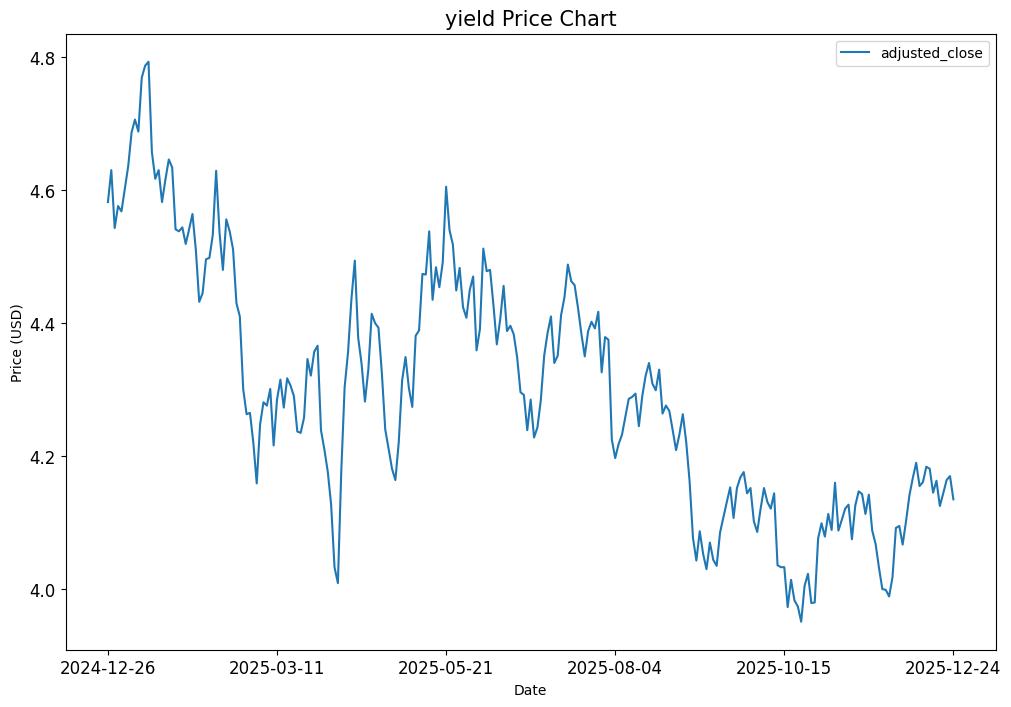

In [14]:
import matplotlib.pyplot as plt
p = us[["date", "adjusted_close"]]
p.set_index("date", inplace=True)
p.plot(figsize = (12,8), fontsize = 12)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.title("yield Price Chart", fontsize = 15)
plt.show()


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()
OPEN_FIGI_KEY = os.getenv("datasource.figi.key")

In [3]:
import requests

headers = {
    "Content-Type": "application/json",
    "X-OPENFIGI-APIKEY": "fa8ec338-7600-419d-9419-d2e7968d8bd9"
}

isin = "US36166NAJ28"  # Example ISIN
#isin = "DE000A3KWKY4"
data = [{"idType": "ID_ISIN", "idValue": isin}]

response = requests.post("https://api.openfigi.com/v3/mapping",
                         headers=headers, json=data)
print(response.json())

[{'data': [{'figi': 'BBG00ZXZWR12', 'name': 'GE CAPITAL FUNDING LLC', 'ticker': 'GE 4.4 05/15/30', 'exchCode': 'TRACE', 'compositeFIGI': None, 'securityType': 'GLOBAL', 'marketSector': 'Corp', 'shareClassFIGI': None, 'securityType2': 'Corp', 'securityDescription': 'GE 4.4 05/15/30'}]}]
